In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage 
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
country_df=pd.read_csv("country-data.csv")
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
country_df.shape

(167, 10)

In [5]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
#Checking the missing values
country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

There is no missing values in the data.

In [7]:
# lets convert exact numbers of exports, import and health are given as % of of gdp.
country_df['exports'] = country_df['exports']*country_df['gdpp']/100
country_df['imports'] = country_df['imports']*country_df['gdpp']/100
country_df['health'] = country_df['health']*country_df['gdpp']/100

Here, exports, heath and imports variables are in percenatge of the total GDP format. So, It is converted into actual value on the basis of GDPP since, GDP data and population data is not present in data set.

In [8]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [9]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# Data Visualization

### Univariate Analysis

We need to choose the countries that are in the direst need of aid. Hence, we need to identify those countries with using some socio-economic and health factors that determine the overall development of the country.

#### We will have a look on the lowest 10 countries for each factor.

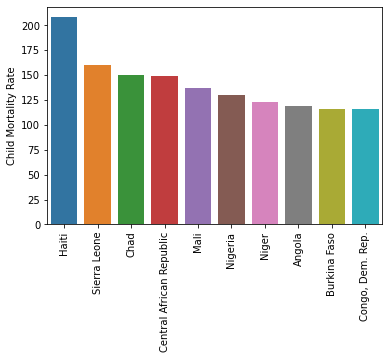

In [10]:

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births

top10_child_mort = country_df[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= top10_child_mort)
plt1.set(xlabel = '', ylabel= 'Child Mortality Rate')
plt.xticks(rotation='vertical')
plt.show()

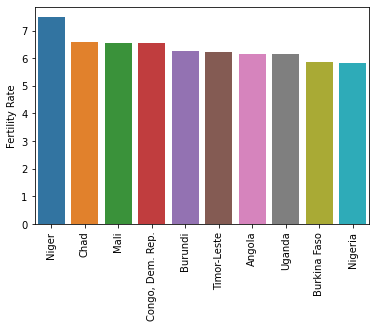

In [11]:
# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the 
#same
top10_total_fer = country_df[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='total_fer', data= top10_total_fer)
plt1.set(xlabel = '', ylabel= 'Fertility Rate')
plt.xticks(rotation='vertical')
plt.show()

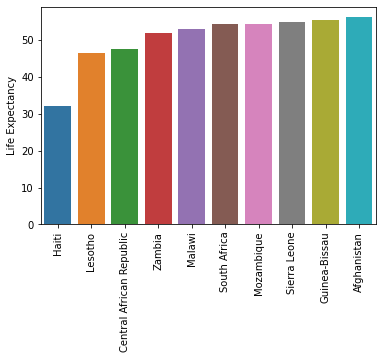

In [12]:
# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same

bottom10_life_expec = country_df[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='life_expec', data= bottom10_life_expec)
plt1.set(xlabel = '', ylabel= 'Life Expectancy')
plt.xticks(rotation="vertical")
plt.show()

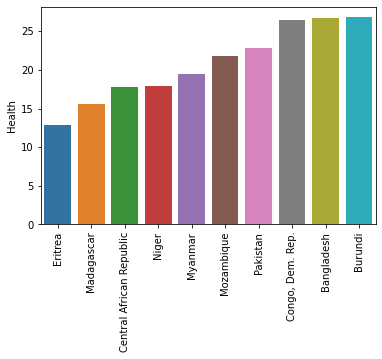

In [13]:
# Health :Total health spending as %age of Total GDP.

bottom10_health = country_df[['country','health']].sort_values('health', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='health', data= bottom10_health)
plt1.set(xlabel = '', ylabel= 'Health')
plt.xticks(rotation="vertical")
plt.show()

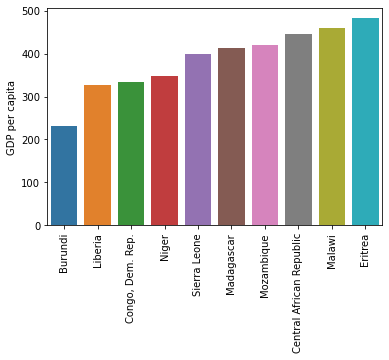

In [14]:
# The GDP per capita : Calculated as the Total GDP divided by the total population.

bottom10_gdpp = country_df[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='gdpp', data= bottom10_gdpp)
plt1.set(xlabel = '', ylabel= 'GDP per capita')
plt.xticks(rotation="vertical")
plt.show()

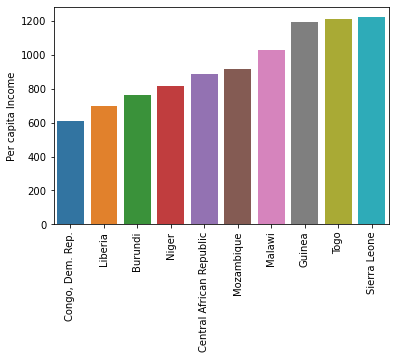

In [15]:
# Per capita Income : Net income per person

bottom10_income = country_df[['country','income']].sort_values('income', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='income', data= bottom10_income)
plt1.set(xlabel = '', ylabel= 'Per capita Income')
plt.xticks(rotation="vertical")
plt.show()

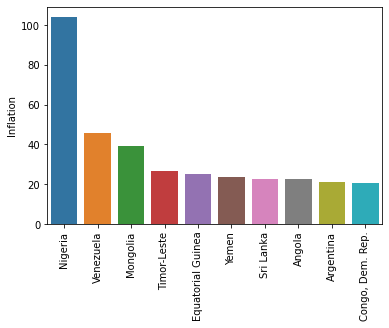

In [16]:
# Inflation: The measurement of the annual growth rate of the Total GDP

top10_inflation = country_df[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='inflation', data= top10_inflation)
plt1.set(xlabel = '', ylabel= 'Inflation')
plt.xticks(rotation="vertical")
plt.show()

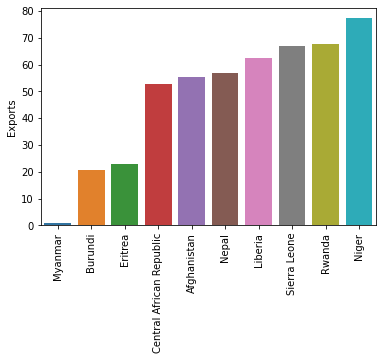

In [17]:
# Exports: Exports of goods and services. Given as %age of the Total GDP

bottom10_exports = country_df[['country','exports']].sort_values('exports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='exports', data= bottom10_exports)
plt1.set(xlabel = '', ylabel= 'Exports')
plt.xticks(rotation="vertical")
plt.show()

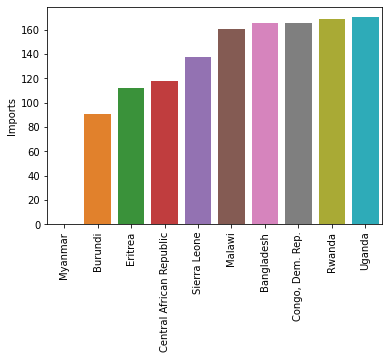

In [18]:
# Imports: Imports of goods and services. Given as %age of the Total GDP

bottom10_imports = country_df[['country','imports']].sort_values('imports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='imports', data= bottom10_imports)
plt1.set(xlabel = '', ylabel= 'Imports')
plt.xticks(rotation="vertical")
plt.show()

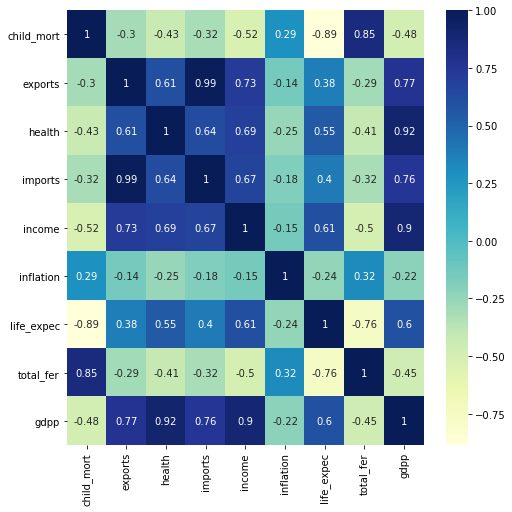

In [19]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (8,8))  
sns.heatmap(country_df.corr(),annot = True,cmap="YlGnBu")
plt.show()

Inference:

- child_mortality and life_expentency are highly correlated with correlation of -0.89
- child_mortality and total_fertility are highly correlated with correlation of 0.85
- imports and exports are highly correlated with correlation of 0.74
- life_expentency and total_fertility are highly correlated with correlation of -0.76

### Checking outliers 

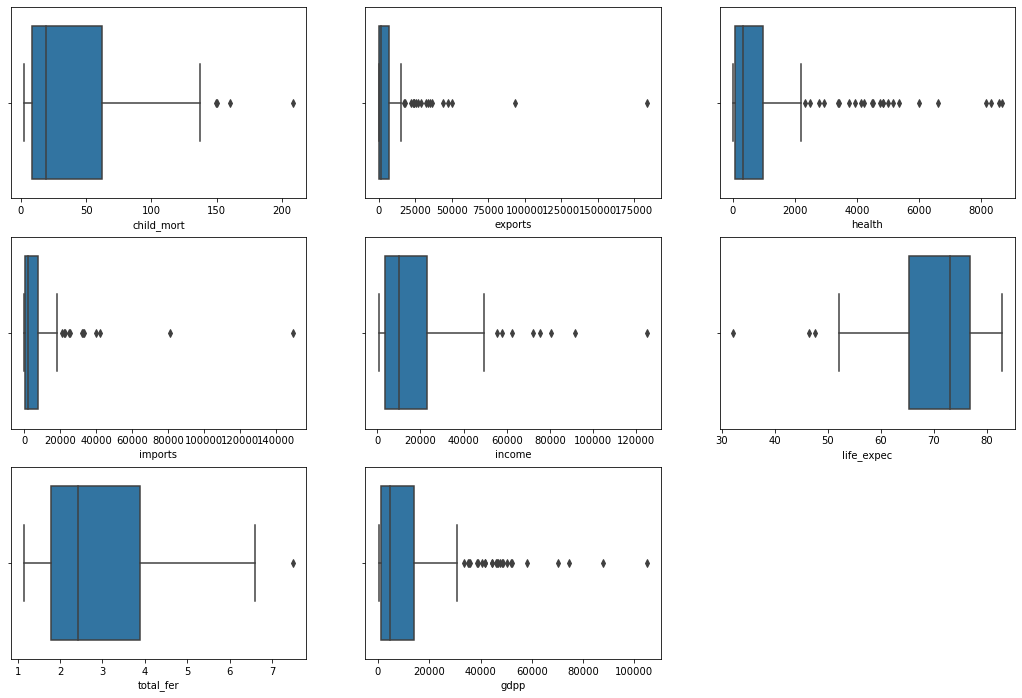

In [20]:
#checking the outliers
plt.figure(figsize=[18,12])

plt.subplot(3,3,1)
sns.boxplot(country_df['child_mort'])

plt.subplot(3,3,2)
sns.boxplot(country_df['exports'])

plt.subplot(3,3,3)
sns.boxplot(country_df['health'])

plt.subplot(3,3,4)
sns.boxplot(country_df['imports'])

plt.subplot(3,3,5)
sns.boxplot(country_df['income'])

plt.subplot(3,3,6)
sns.boxplot(country_df['life_expec'])

plt.subplot(3,3,7)
sns.boxplot(country_df['total_fer'])

plt.subplot(3,3,8)
sns.boxplot(country_df['gdpp'])


So, as we can there are ouliers in our numeric columns

### Treating outliers

In [21]:
def outlier_treatment(country_country_df, col):
    
    Q1 = country_df[col].quantile(0.25)

    Q3 = country_df[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_cap  = Q1-1.5*IQR

    higher_cap = Q3+1.5*IQR

    country_df.loc[(country_df[col] > higher_cap), col] = higher_cap
    country_df.loc[(country_df[col] < lower_cap), col] = lower_cap
    
    return country_df

In [22]:
country_df = outlier_treatment(country_df, 'child_mort')
country_df = outlier_treatment(country_df, 'exports')
country_df = outlier_treatment(country_df, 'health')
country_df = outlier_treatment(country_df, 'imports')
country_df = outlier_treatment(country_df, 'income')
country_df = outlier_treatment(country_df, 'inflation')
country_df = outlier_treatment(country_df, 'life_expec')
country_df = outlier_treatment(country_df, 'total_fer')
country_df = outlier_treatment(country_df, 'gdpp')

In [23]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,37.698204,4710.954895,680.241240,4756.898995,15921.574850,7.065066,70.663772,2.945075,10351.281437
std,38.443293,5832.960967,804.768458,5690.687520,15207.197459,6.704968,8.522535,1.505564,11612.044330
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,48.050000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,142.875000,17524.290000,2324.546750,18338.677500,51967.500000,24.160000,82.800000,7.007500,33130.000000


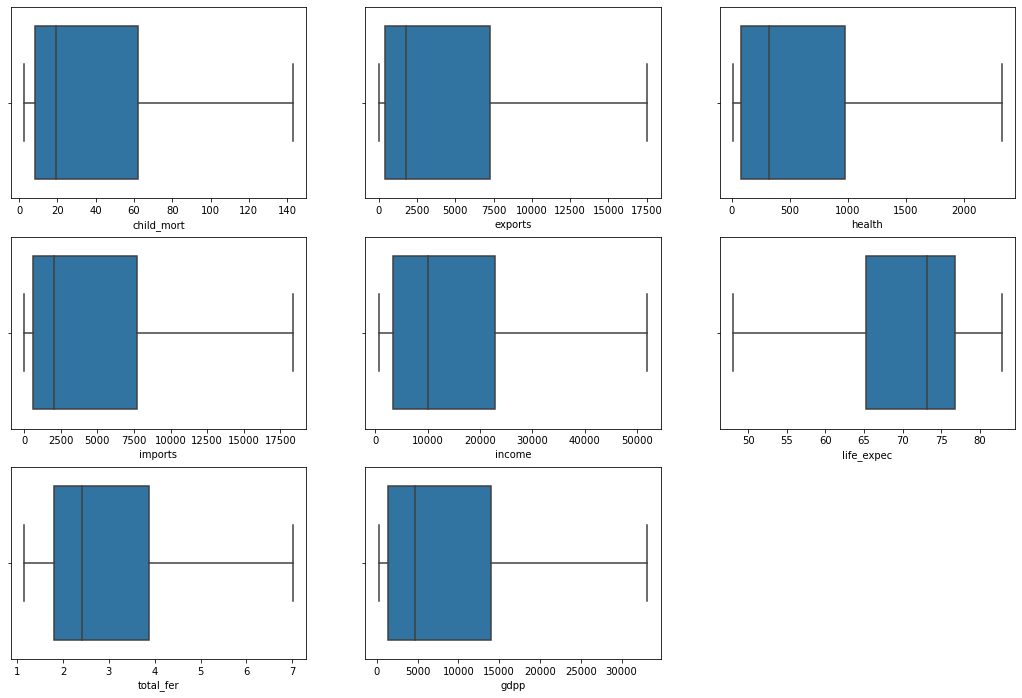

In [24]:
plt.figure(figsize=[18,12])

plt.subplot(3,3,1)
sns.boxplot(country_df['child_mort'])

plt.subplot(3,3,2)
sns.boxplot(country_df['exports'])

plt.subplot(3,3,3)
sns.boxplot(country_df['health'])

plt.subplot(3,3,4)
sns.boxplot(country_df['imports'])

plt.subplot(3,3,5)
sns.boxplot(country_df['income'])

plt.subplot(3,3,6)
sns.boxplot(country_df['life_expec'])

plt.subplot(3,3,7)
sns.boxplot(country_df['total_fer'])

plt.subplot(3,3,8)
sns.boxplot(country_df['gdpp'])

## Scaling the data 

In [25]:
country_df1=country_df.drop('country', axis=1)

In [26]:
country_df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [27]:
standard_scaler=StandardScaler()
country_df1=standard_scaler.fit_transform(country_df1)

In [28]:
country_df1.shape

(167, 9)

# KMeans Clustering

### Finding the optimal number of clusters

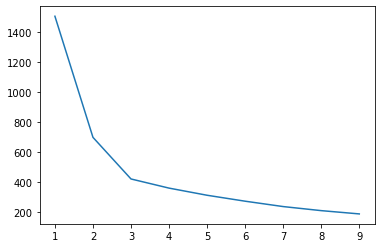

In [29]:
#Elbow curve
ssd = []
for k in list(range(1,10)):
    model = KMeans(n_clusters = k, max_iter = 50).fit(country_df1)
    ssd.append([k, model.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1]);  

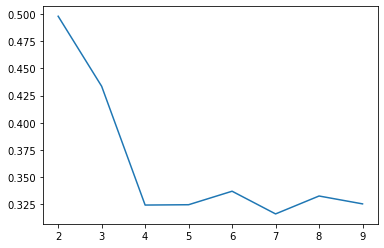

In [30]:
ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(country_df1)
    ss.append([k, silhouette_score(country_df1, kmeans.labels_)])
    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1]);    

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [31]:
range_n_cluster=[2,3,4,5,6,7,8]
for num_cluster in range_n_cluster:
    
    #intialize kmeans
    kmeans=KMeans(n_clusters=num_cluster, max_iter=50)
    kmeans.fit(country_df1)
    
    cluster_labels=kmeans.labels_
    
    #silhouette score
    silhouette_avg=silhouette_score(country_df1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_cluster, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4980131625805177
For n_clusters=3, the silhouette score is 0.43360177139259864
For n_clusters=4, the silhouette score is 0.3253487802045869
For n_clusters=5, the silhouette score is 0.3246750495397991
For n_clusters=6, the silhouette score is 0.3563500811094962
For n_clusters=7, the silhouette score is 0.3178099102447766
For n_clusters=8, the silhouette score is 0.3315340581976425


## Optimal Number of K=3

### Intialising KMeans

In [32]:
kmeans = KMeans(n_clusters=3, max_iter=100 , random_state = 100)
kmeans.fit(country_df1)

KMeans(max_iter=100, n_clusters=3, random_state=100)

In [33]:
kmeans.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 0, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 1, 2, 2,
       1, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

In [34]:
#keeping our original data safe
country_df_org = country_df.copy()

In [35]:
country_df2 = pd.concat([country_df, pd.Series(kmeans.labels_)], axis = 1)
country_df2.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','cluster_id']
country_df2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


In [36]:
country_df2['cluster_id'].value_counts()

2    78
1    48
0    41
Name: cluster_id, dtype: int64

## KMeans cluster visualizations

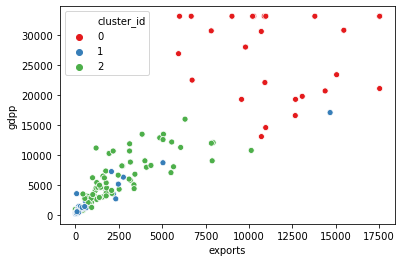

In [37]:
sns.scatterplot(x = 'exports', y = 'gdpp', hue ='cluster_id', legend = 'full', data = country_df2, palette='Set1')
plt.show()

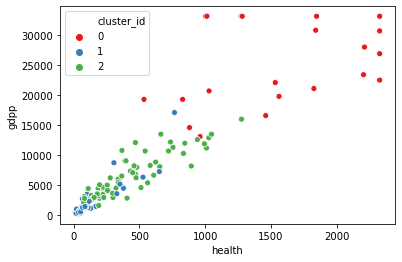

In [38]:
sns.scatterplot(x = 'health', y = 'gdpp', hue ='cluster_id', legend = 'full', data = country_df2, palette='Set1')
plt.show()

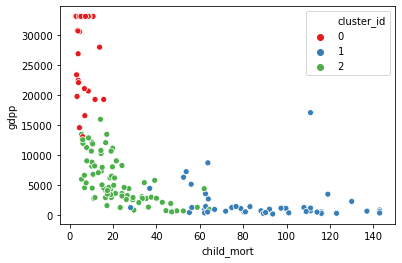

In [39]:
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue ='cluster_id', legend = 'full', data = country_df2, palette='Set1')
plt.show()

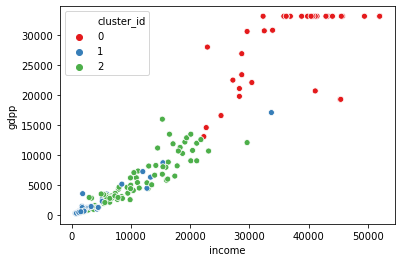

In [40]:
sns.scatterplot(x = 'income', y = 'gdpp', hue ='cluster_id', legend = 'full', data = country_df2, palette='Set1')
plt.show()

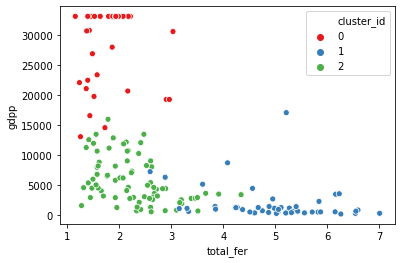

In [41]:
sns.scatterplot(x = 'total_fer', y = 'gdpp', hue ='cluster_id', legend = 'full', data = country_df2, palette='Set1')
plt.show()

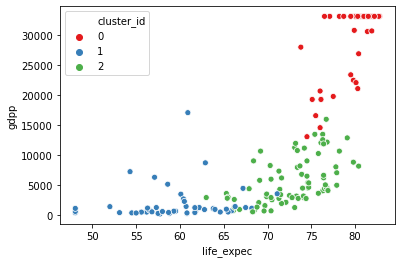

In [42]:
sns.scatterplot(x = 'life_expec', y = 'gdpp', hue ='cluster_id', legend = 'full', data = country_df2, palette='Set1')
plt.show()

## KMeans cluesters Profiling

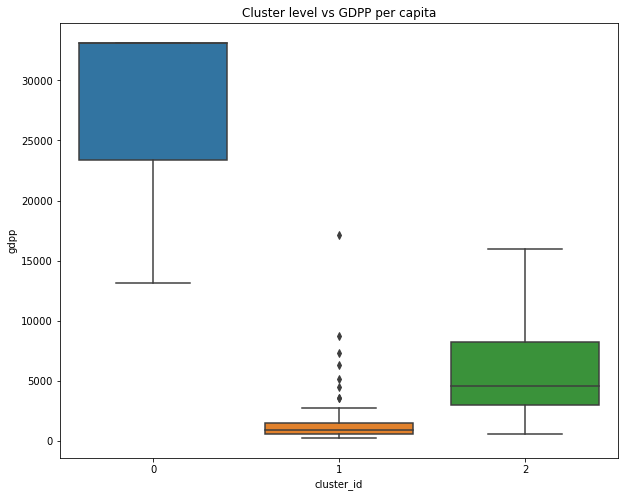

In [43]:
plt.figure(figsize=(10,8))
plt.title('Cluster level vs GDPP per capita')
sns.boxplot(data=country_df2,x = 'cluster_id',y='gdpp')
plt.show()

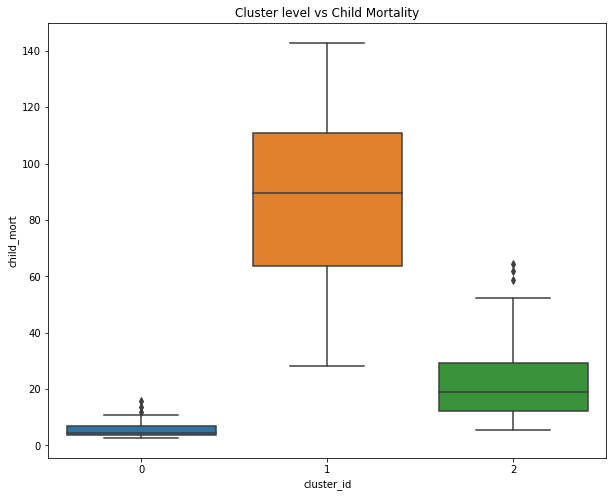

In [44]:
plt.figure(figsize=(10,8))
plt.title('Cluster level vs Child Mortality')
sns.boxplot(data=country_df2,x = 'cluster_id',y='child_mort')
plt.show()

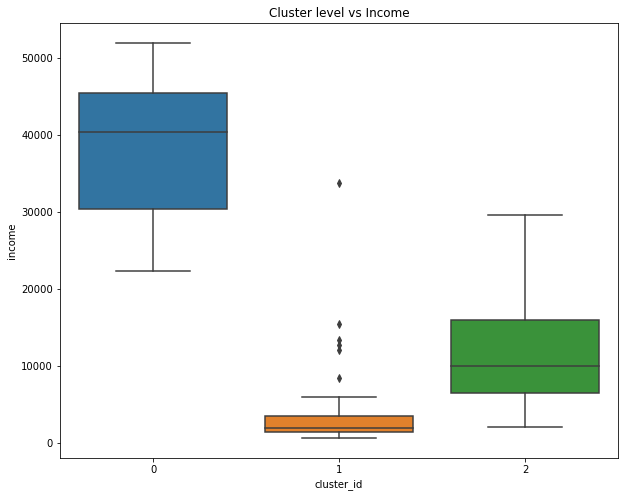

In [45]:
plt.figure(figsize=(10,8))
plt.title('Cluster level vs Income')
sns.boxplot(data=country_df2,x = 'cluster_id',y='income')
plt.show()

#### Cluster id 1 has very low income and gdpp and very high child mortality rate this cluster will be our focus.

In [46]:
#Finding the observations that belong to cluster id 1
country_df2[country_df2['cluster_id']==1]['country']


0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

In [47]:
top_kmeans = country_df2[country_df2['cluster_id']==1].sort_values(by=["child_mort","gdpp","income"], ascending=[False, True,True])
top_kmeans = top_kmeans.reset_index().drop('index',axis=1)
top_kmeans.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Sierra Leone,142.875,67.032,52.2690,137.655,1220.0,17.20,55.00,5.2000,399.0,1
1,Central African Republic,142.875,52.628,17.7508,118.190,888.0,2.01,48.05,5.2100,446.0,1
2,Haiti,142.875,101.286,45.7442,428.314,1500.0,5.45,48.05,3.3300,662.0,1
3,Chad,142.875,330.096,40.6341,390.195,1930.0,6.39,56.50,6.5900,897.0,1
4,Mali,137.000,161.424,35.2584,248.508,1870.0,4.37,59.50,6.5500,708.0,1
5,Nigeria,130.000,589.490,118.1310,405.420,5150.0,24.16,60.50,5.8400,2330.0,1
6,Niger,123.000,77.256,17.9568,170.868,814.0,2.55,58.80,7.0075,348.0,1
7,Angola,119.000,2199.190,100.6050,1514.370,5900.0,22.40,60.10,6.1600,3530.0,1
8,"Congo, Dem. Rep.",116.000,137.274,26.4194,165.664,609.0,20.80,57.50,6.5400,334.0,1
9,Burkina Faso,116.000,110.400,38.7550,170.200,1430.0,6.81,57.90,5.8700,575.0,1


In [48]:
top_10 = top_kmeans.iloc[:10]
top_10['country'].reset_index().drop('index',axis=1)

,country
0,Sierra Leone
1,Central African Republic
2,Haiti
3,Chad
4,Mali
5,Nigeria
6,Niger
7,Angola
8,"Congo, Dem. Rep."
9,Burkina Faso


## Top 10 countries obtained from K-Means Models are:

-   Sierra Leone
-	Central African Republic
-	Haiti
-	Chad
-	Mali
-	Nigeria
-	Niger
-	Angola
-	Congo, Dem. Rep.
-	Burkina Faso

# Hierarchical Clustering

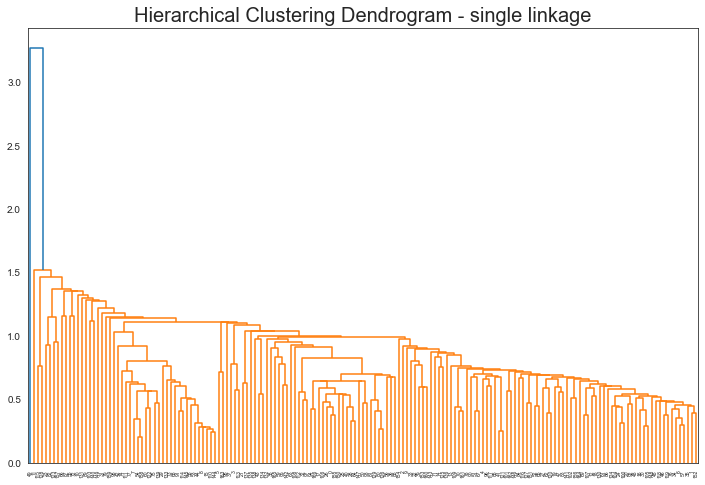

In [64]:

plt.figure(figsize=(12,8))
sns.set_style('white')

plt.title('Hierarchical Clustering Dendrogram - single linkage',fontsize=20)

mergings_single = linkage(country_df1, method="single", metric='euclidean')
dendrogram(mergings_single)
plt.show()

### Single linkage clusters are not forming correctly, so we will not use this modelling.

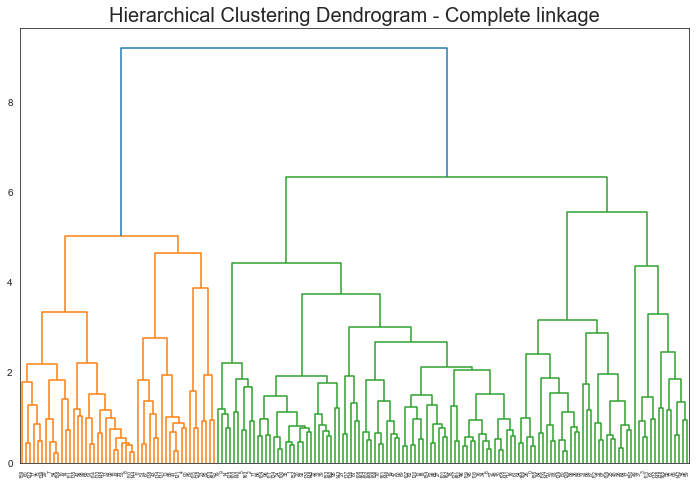

In [66]:

plt.figure(figsize=(12,8))
plt.title('Hierarchical Clustering Dendrogram - Complete linkage',fontsize=20)

mergings_complete = linkage(country_df1, method="complete", metric='euclidean')
dendrogram(mergings_complete)
plt.show()

### Complete linkage is better than Single linkage. So we will go with complete linkage.

#### The above dendrogram of hierarchical clustering is 3 clusters.

In [51]:
# 3 clusters
cluster_labels = cut_tree(mergings_complete, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 2, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 2, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 1, 2, 1, 0, 2, 1, 0,
       0, 2, 2, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 2, 0, 1, 2,
       0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [52]:
country_df3 = pd.concat([country_df, pd.Series(cluster_labels)], axis = 1)
country_df3.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','cluster_labels']
country_df3.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


In [53]:
country_df3['cluster_labels'].value_counts()

1    75
2    49
0    43
Name: cluster_labels, dtype: int64

## Hierarchical cluster visualization

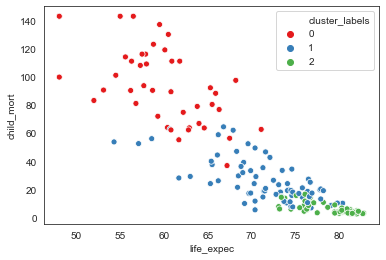

In [54]:
sns.scatterplot(x = 'life_expec', y = 'child_mort', hue ='cluster_labels', legend = 'full', data = country_df3, palette='Set1')
plt.show()

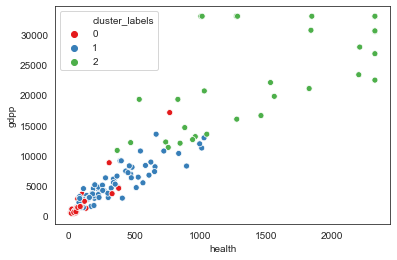

In [55]:
sns.scatterplot(x = 'health', y = 'gdpp', hue ='cluster_labels', legend = 'full', data = country_df3, palette='Set1')
plt.show()

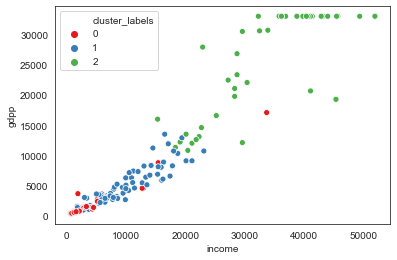

In [56]:
sns.scatterplot(x = 'income', y = 'gdpp', hue ='cluster_labels', legend = 'full', data = country_df3, palette='Set1')
plt.show()

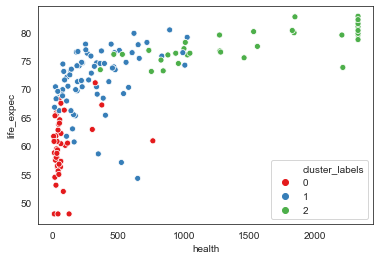

In [57]:
sns.scatterplot(x = 'health', y = 'life_expec', hue ='cluster_labels', legend = 'full', data = country_df3, palette='Set1')
plt.show()

## Cluster Profiling 

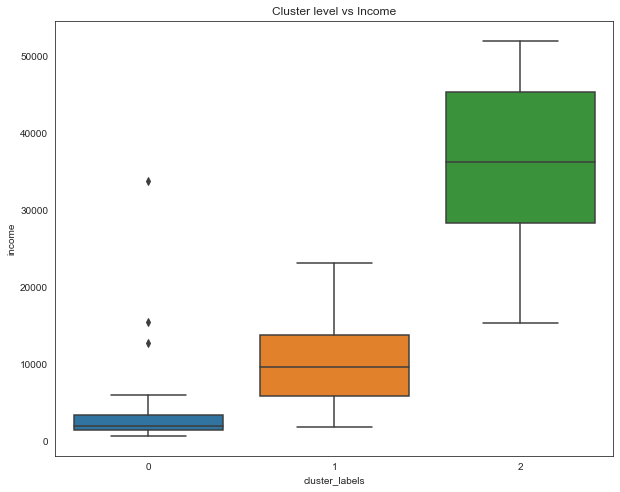

In [58]:
plt.figure(figsize=(10,8))
plt.title('Cluster level vs Income')
sns.boxplot(data=country_df3,x = 'cluster_labels',y='income')
plt.show()

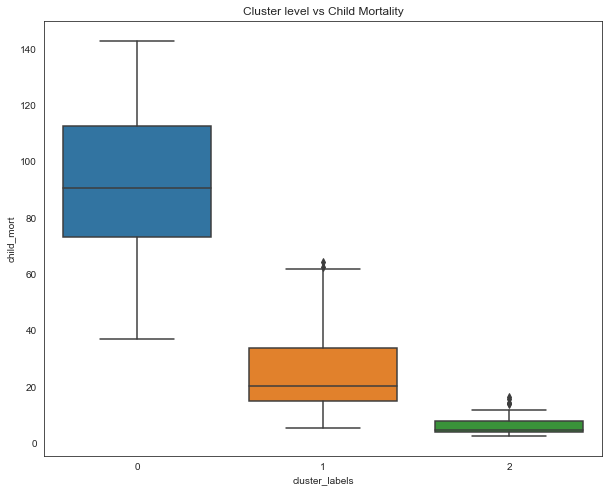

In [59]:
plt.figure(figsize=(10,8))
plt.title('Cluster level vs Child Mortality')
sns.boxplot(data=country_df3,x = 'cluster_labels',y='child_mort')
plt.show()

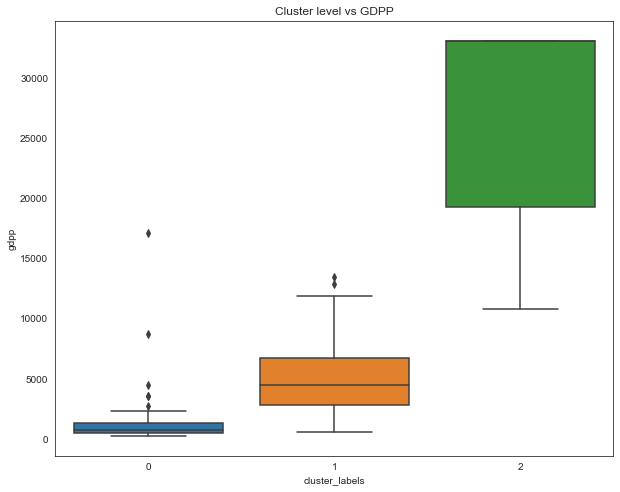

In [60]:
plt.figure(figsize=(10,8))
plt.title('Cluster level vs GDPP')
sns.boxplot(data=country_df3,x = 'cluster_labels',y='gdpp')
plt.show()

cluster 0 have low income and low gdpp and high child_mort.

### Finding the observations that belong to cluster 0


In [61]:
country_df3[country_df3['cluster_labels']==0]['country']

0                   Afghanistan
3                        Angola
17                        Benin
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106                  Mozambique
112                       Niger
113     

In [62]:
top_hierarchical = country_df3[country_df3['cluster_labels']==0].sort_values(by=["child_mort","gdpp","income"], ascending=[False, True,True]) 
top_hierarchical = top_hierarchical.reset_index().drop('index',1)
top_hierarchical.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Sierra Leone,142.875,67.032,52.2690,137.655,1220.0,17.20,55.00,5.2000,399.0,0
1,Central African Republic,142.875,52.628,17.7508,118.190,888.0,2.01,48.05,5.2100,446.0,0
2,Haiti,142.875,101.286,45.7442,428.314,1500.0,5.45,48.05,3.3300,662.0,0
3,Chad,142.875,330.096,40.6341,390.195,1930.0,6.39,56.50,6.5900,897.0,0
4,Mali,137.000,161.424,35.2584,248.508,1870.0,4.37,59.50,6.5500,708.0,0
5,Nigeria,130.000,589.490,118.1310,405.420,5150.0,24.16,60.50,5.8400,2330.0,0
6,Niger,123.000,77.256,17.9568,170.868,814.0,2.55,58.80,7.0075,348.0,0
7,Angola,119.000,2199.190,100.6050,1514.370,5900.0,22.40,60.10,6.1600,3530.0,0
8,"Congo, Dem. Rep.",116.000,137.274,26.4194,165.664,609.0,20.80,57.50,6.5400,334.0,0
9,Burkina Faso,116.000,110.400,38.7550,170.200,1430.0,6.81,57.90,5.8700,575.0,0


In [63]:
top_10_h = top_hierarchical.iloc[:10]
top_10_h['country'].reset_index().drop('index',axis=1)

,country
0,Sierra Leone
1,Central African Republic
2,Haiti
3,Chad
4,Mali
5,Nigeria
6,Niger
7,Angola
8,"Congo, Dem. Rep."
9,Burkina Faso


## Top 10 Countries obtained from Hierarchical Models are:

- Sierra Leone
- Central African Republic
- Haiti
- Chad
- Mali
- Nigeria
- Niger
- Angola
- Congo, Dem. Rep.
- Burkina Faso 

# Result

My result is same in both methods which is same top 10 countries and i sorted countries by considering the lowest gdpp.

We have seen from both methods - (K-Means and Hierarchical clustering) that top 10 countries are are similar. I would choose the final countries from hierarchical clustering because the comlete linkage give us accurate output than k-means clustering. I have compared the clusters and visualized from both methods and hierarchical clustering gave precise information than K-Means clustering.

## Conclusion 

So, in our both Kmeans and hierarchical clustering got same countires with the lowest gdpp that I report back to the ceo at least 5 countries which are in direst need of aid from the analysis work that you perform.